In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [2]:
#Example diffusion merton jump diffusion


def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    print(size)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =10000 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)


(10000, 1)


Text(0.5, 1.0, 'Jump Diffusion Process')

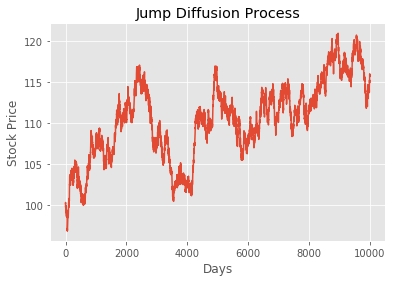

In [3]:
plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

Fonctions persos

In [27]:
def OU(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10 ):        
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()
    plt.plot(x)
    return(x)

In [26]:
def CIR(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10 ):        
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i])*np.sqrt(dt)*np.random.randn()
    plt.plot(x)
    return(x)

In [4]:
def OU_jump(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,l_mu=0,nu =0.3):        
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()+np.random.poisson( lamb*dt)* np.random.normal(l_mu,nu)
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()+ np.random.normal(l_mu,nu,np.random.poisson( lamb*dt)).sum()
 
   # plt.plot(x)
    return(x)

In [5]:
def CIR_jump(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,l_mu=0,nu =0.3):        
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()+np.random.poisson( lamb*dt)* np.random.normal(l_mu,nu)
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i])*np.sqrt(dt)*np.random.randn()+ np.random.normal(l_mu,nu,np.random.poisson( lamb*dt)).sum()
 
   # plt.plot(x)
    return(x)

In [6]:
def global_jump(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,l_mu=0,nu =0.3,VI=0,x_star=-0.6,gamma=0.022):   
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i]-VI)*np.sqrt(dt)*np.random.randn()+ np.random.poisson( lamb*dt)*(x_star-x[i])
         x[i+1]= x[i]+(1/(th*np.exp(-x[i]*gamma)))*(mu-x[i])*dt+sig*np.sqrt(x[i]-VI)*np.sqrt(dt)*np.random.randn()+ np.random.poisson( lamb*dt)*(x_star-x[i])
 
    #plt.plot(x)
    return(x)

In [34]:
np.random.uniform(0,2,10).sum()

11.43647349836122

In [35]:
def OU_jump_up(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,amplitude=1):        
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()+np.random.poisson( lamb*dt)* np.random.normal(l_mu,nu)
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()+ np.random.uniform(0,amplitude,np.random.poisson( lamb*dt)).sum()
 
   # plt.plot(x)
    return(x)

In [36]:
def CIR_jump_up(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,amplitude=1):        
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(dt)*np.random.randn()+np.random.poisson( lamb*dt)* np.random.normal(l_mu,nu)
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i])*np.sqrt(dt)*np.random.randn()+ np.random.uniform(0,amplitude,np.random.poisson( lamb*dt)).sum()
 
   # plt.plot(x)
    return(x)

In [67]:
def reset_jump(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,VR=-0.6):   
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i]-VI)*np.sqrt(dt)*np.random.randn()+ np.random.poisson( lamb*dt)*(x_star-x[i])
         x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(np.abs(x[i]))*np.sqrt(dt)*np.random.randn()+ np.random.poisson( lamb*dt)*(VR-x[i])
 
    #plt.plot(x)
    return(x)

In [75]:
np.random.poisson( 5,2)

array([4, 6])

In [82]:
#constant amplitude jumps model’
def constant_amplitude_jump(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,amplitude=1,VR=-1):   
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        Poisson= np.random.poisson( lamb*dt,2)
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i]-VI)*np.sqrt(dt)*np.random.randn()+ np.random.poisson( lamb*dt)*(x_star-x[i])
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(np.abs(x[i]))*np.sqrt(dt)*np.random.randn()+ Poisson[0]*(VR-x[i])+ Poisson[1]*amplitude
 
    #plt.plot(x)
    return(x)

In [91]:
def constant_amplitude_jump_v2(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-2,T=10,lamb=1,amplitude=1):   
    x = np.ones(T)
    x[0]=X0
    for i in range(T-1):
        Poisson= np.random.poisson( lamb*dt,2)
        #x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(x[i]-VI)*np.sqrt(dt)*np.random.randn()+ np.random.poisson( lamb*dt)*(x_star-x[i])
        x[i+1]= x[i]+th*(mu-x[i])*dt+sig*np.sqrt(np.abs(x[i]))*np.sqrt(dt)*np.random.randn()- Poisson[0]*amplitude+ Poisson[1]*amplitude
 
    #plt.plot(x)
    return(x)

Figures

array([1.        , 1.02292246, 0.98707855, 1.0273751 , 0.95096961,
       0.95592706, 0.96221472, 0.97781024, 0.97906143, 1.00419458,
       1.00016597, 1.04573435, 1.09049483, 1.09687704, 1.09198303,
       1.08064853, 1.11388722, 1.08189414, 1.10541587, 1.12084532,
       1.0860273 , 1.07963975, 1.04695034, 0.97489175, 0.96790049,
       0.9980402 , 0.95298458, 0.96286309, 0.99991881, 1.03893851,
       0.99211226, 0.93434911, 0.98037714, 0.9797122 , 0.9404372 ,
       0.92908858, 0.90284267, 0.90476664, 0.90272809, 0.89052392,
       0.87605025, 0.85570324, 0.86975175, 0.86087867, 0.84740478,
       0.88842174, 0.8812132 , 0.83492456, 0.8547375 , 0.84616881,
       0.86414877, 0.89053035, 0.89528812, 0.88018253, 0.90352928,
       0.90862225, 0.87827636, 0.85714588, 0.83507377, 0.87501895,
       0.87317841, 0.8825834 , 0.89116082, 0.94378711, 0.93807491,
       0.9843401 , 0.91930303, 0.91283497, 0.92210499, 0.9271421 ,
       0.91942129, 0.91041595, 0.84134421, 0.84968897, 0.81067

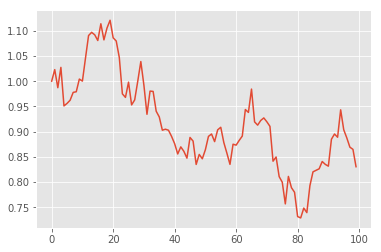

In [7]:
OU(th = -1,mu = 1.2,sig = 0.3,dt = 1e-2,T=100)

In [ ]:
CIR(X0=1,th = 1,mu = 1.2,sig = 0.2,dt = 1e-2,T=100)

In [ ]:
OU_jump(X0=1,th = -1,mu = 1.2,sig = 0.2,dt = 1e-3,T=1000,lamb=1,l_mu=0,nu =0.3)

In [ ]:
CIR_jump(X0=1,th = 1,mu = 1.2,sig = 0.2,dt = 1e-3,T=1000,lamb=1,l_mu=0,nu =0.3)

In [ ]:
global_jump(X0=0.1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-3,T=10000,lamb=10,l_mu=0,nu =0.3,VI=-0.75,x_star=-0.68,gamma=0.022)

Plot multiple figures:

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
X = np.arange(0, math.pi*2, 0.05)

# Assign variables to the y axis part of the curve
y = np.sin(X)
z = np.cos(X)

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='sin')
plt.plot(X, z, color='g', label='cos')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Angle")
plt.ylabel("Magnitude")
plt.title("Sine and Cosine functions")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()


In [12]:
N=5
colors = ['blue','red','orange','green','purple','cyan','magenta','pink','black','yellow']

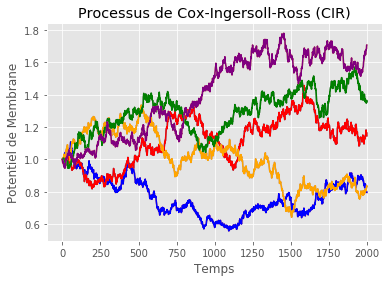

In [29]:
for i in range(N):
    X=CIR(X0=1,th = 0.5,mu = 1.2,sig = 0.3,dt = 1e-3,T=2000)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Cox-Ingersoll-Ross (CIR)")
plt.show()

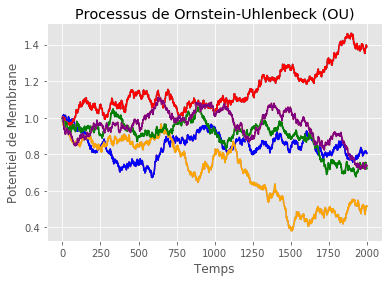

In [30]:
for i in range(N):
    X=OU(X0=1,th = -0.5,mu = 1.2,sig = 0.2,dt = 1e-3,T=2000)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Ornstein-Uhlenbeck (OU)")
plt.show()

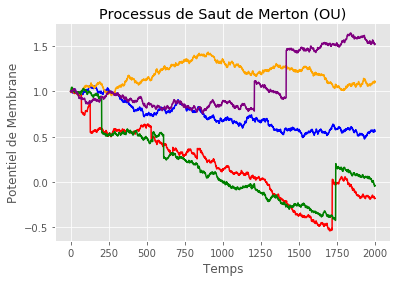

In [21]:
for i in range(N):
    X=OU_jump(X0=1,th = -0.5,mu = 1.2,sig = 0.2,dt = 1e-3,T=2000,lamb=1,l_mu=0,nu =0.3)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Saut de Merton (OU)")
plt.show()

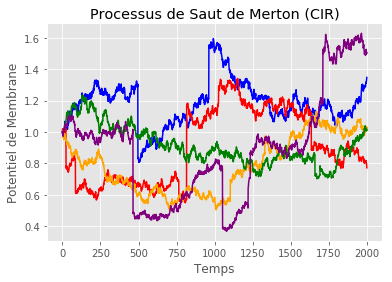

In [24]:
for i in range(N):
    X=CIR_jump(X0=1,th = 0.5,mu = 1.2,sig = 0.3,dt = 1e-3,T=2000,lamb=2,l_mu=0,nu =0.3)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Saut de Merton (CIR)")
plt.show()

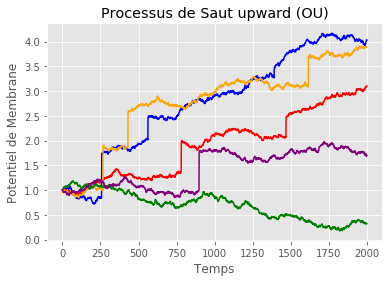

In [57]:
for i in range(N):
    X=OU_jump_up(X0=1,th = -0.5,mu = 1.2,sig = 0.3,dt = 1e-3,T=2000,lamb=1,amplitude=1)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Saut upward (OU)")
plt.show()

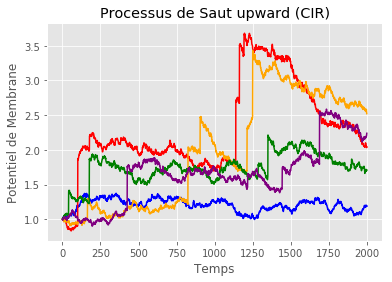

In [49]:
for i in range(N):
    X=CIR_jump_up(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-3,T=2000,lamb=2,amplitude=1)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Saut upward (CIR)")
plt.show()

In [ ]:
for i in range(N):
    X=global_jump(X0=0.1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-3,T=10000,lamb=10,l_mu=0,nu =0.3,VI=-0.75,x_star=-0.68,gamma=0.022)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title("Processus de Saut upward (OU)")
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


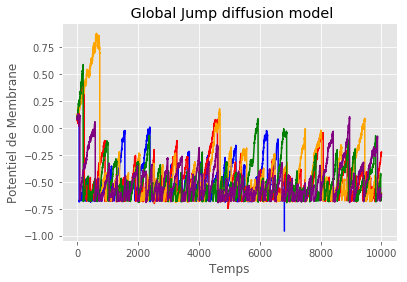

In [59]:
for i in range(N):
    X=global_jump(X0=0.1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-3,T=10000,lamb=10,l_mu=0,nu =0.3,VI=-0.75,x_star=-0.68,gamma=0.022)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title(" Global Jump diffusion model")
plt.show()

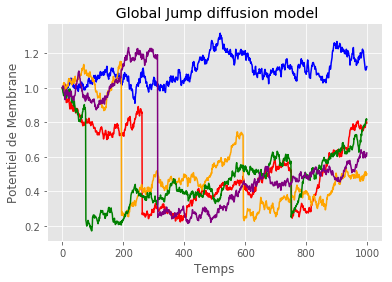

In [62]:
for i in range(N):
    X=global_jump(X0=1,th = 1,mu = 1.2,sig = 0.3,dt = 1e-3,T=1000,lamb=2,l_mu=0,nu =0.3,VI=-0.75,x_star=0.25,gamma=0.022)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title(" Global Jump diffusion model")
plt.show()

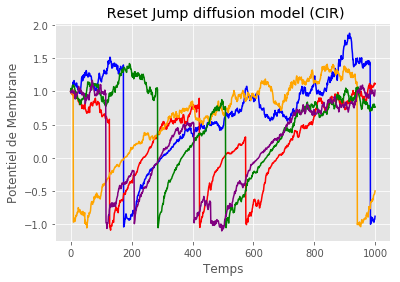

In [73]:
for i in range(N):
    X=reset_jump(X0=1,th = 0.5,mu = 1.2,sig = 0.3,dt = 1e-2,T=1000,lamb=0.5,VR=-1)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title(" Reset Jump diffusion model (CIR)")
plt.show()

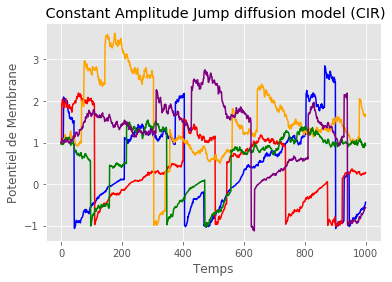

In [88]:
for i in range(N):
    X=constant_amplitude_jump(X0=1,th = 0.5,mu = 1.2,sig = 0.3,dt = 1e-2,T=1000,lamb=0.5,VR=-1,amplitude=1)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title(" Constant Amplitude Jump diffusion model (CIR)")
plt.show()

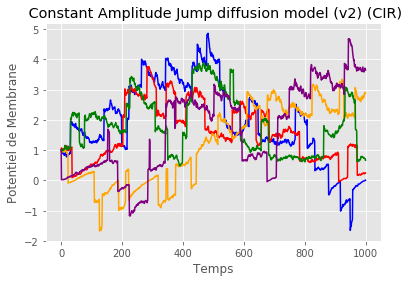

In [94]:
for i in range(N):
    X=constant_amplitude_jump_v2(X0=1,th = 0.5,mu = 1.2,sig = 0.3,dt = 1e-2,T=1000,lamb=1,amplitude=1)
    plt.plot(X,color=colors[i])
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Temps")
plt.ylabel("Potentiel de Membrane")
plt.title(" Constant Amplitude Jump diffusion model (v2) (CIR)")
plt.show()